In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tables = pd.read_html("https://java.hlrs.de/hpc-projects/public/projects")

In [4]:
projects = tables[1]
x = projects.groupby(['Application Area'])['Application Area'].count()
groups = dict(x)

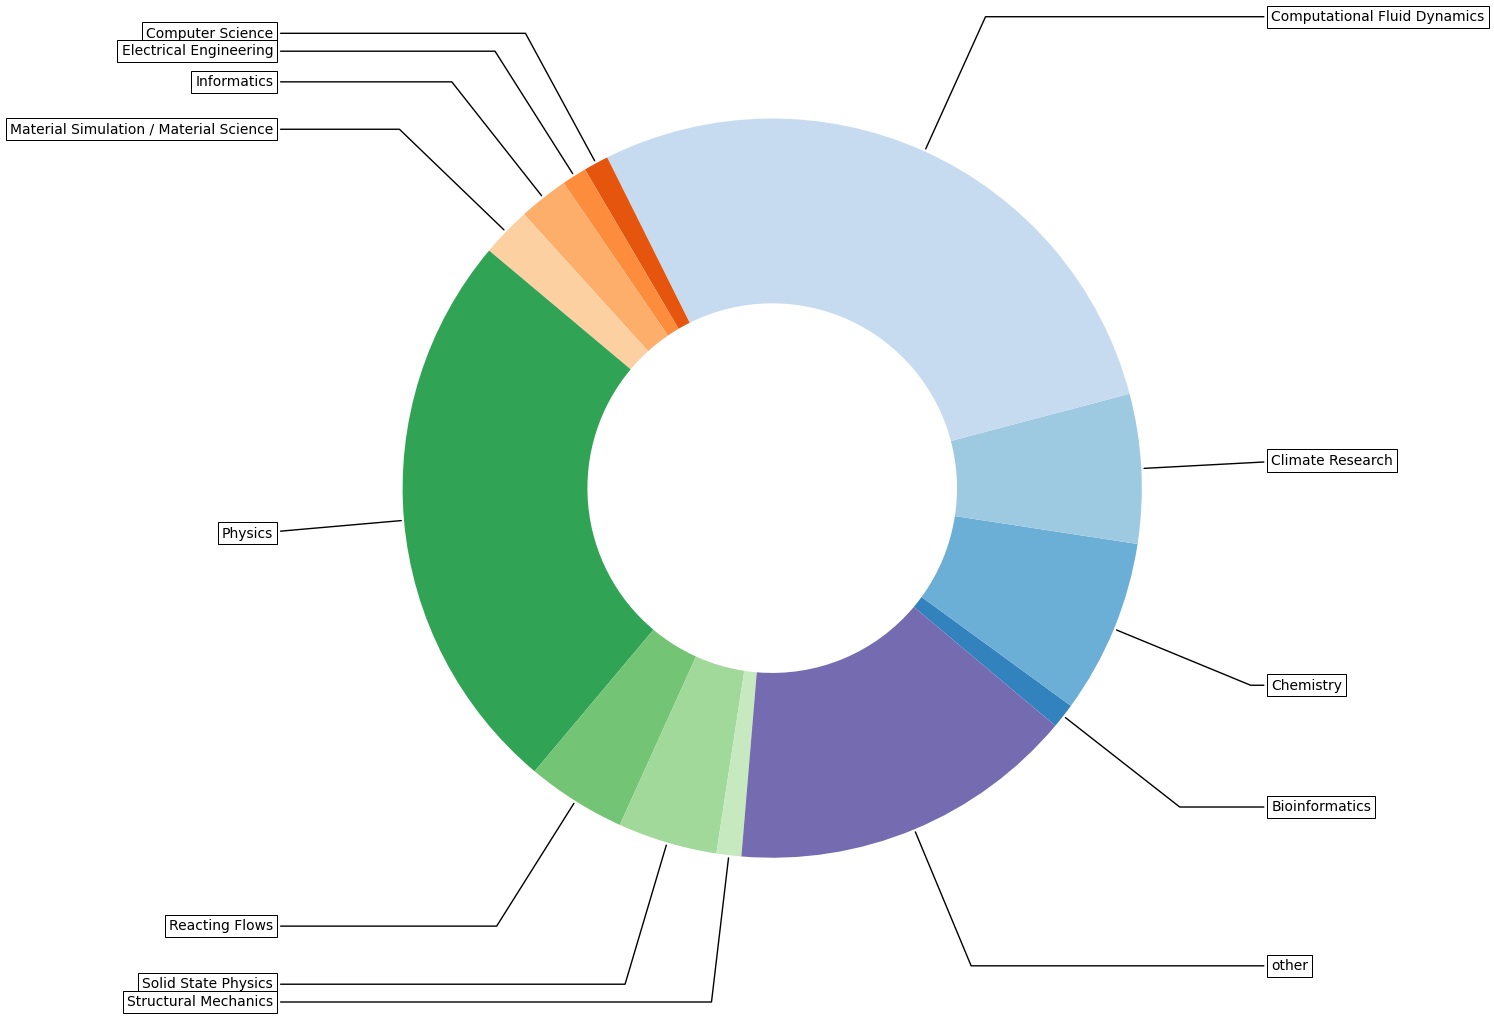

In [5]:
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(groups.values(), wedgeprops=dict(width=0.5), startangle=-40, colors=plt.cm.tab20c.colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(list(groups.keys())[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

fig.savefig("hlrs-projects.pdf", bbox_inches='tight')